# Introduction

MedGemma is a multimodal specialized model from Google DeepMind. It is based on Gemma 3 model.

MedGemma comes in two variants:
* A 4B multimodal version (tex-image input and text output)  
* A 27B text-only version

MedGemma 4B uses an image encoder that was trained with a large variety of medical data (anonymized), that include X-Ray, dermatology images, MRI images, ophtalmology images, and histopathology digitized images.

Few resources available:
* Model on Google Cloud Model Garden: [MedGemma](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/medgemma)
* Model on Hugging Face: [MedGemma](https://huggingface.co/collections/google/medgemma-release-680aade845f90bec6a3f60c4)
* GitHub repository (supporting code, Colab notebooks, discussions, and issues): [MedGemma](https://github.com/google-health/medgemma)

Important:
* MedGemma can be used in research and/or clinical decision support, not direct diagnosis.  
* It is trained with privacy and security in mind (HIPPA & GDPR-aligned practices).
* MedGemma is transparent about its limitations, biases, and potential misdiagnosis risks.




# Prerequisites

Gemma 3 is supported from transformers 4.50.0. If your Notebook is preinstalled with an earlier version, you will need to upgrage transformers library:

```python
pip install -U transformers
```

In [1]:
import os
import torch
import requests
from PIL import Image
from transformers import pipeline
from kaggle_secrets import UserSecretsClient
from huggingface_hub import login
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

2025-06-25 10:08:30.182768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750846110.370831      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750846110.434824      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the model

We will load the model from HuggingFace, since at the time when this Notebook was written, the model is not yet published on Kaggle.  

The model is protected, therefore you will have to:
- Authenticate before accessing.
- Accept the terms and conditions to use it.

You have few alternatives to access the model. On Kaggle, it is most convenient to use a access token, generated from HuggingFace and stored as a secret using `kaggle_secrets`.

## Authenticate to access the model

In [2]:
user_secrets = UserSecretsClient()
hugging_face_token = user_secrets.get_secret("HUGGINGFACE_TOKEN")

After you load the secret, you can login using `huggingface_hub` `login` function and with the authentication token as parameter.

In [3]:

login(hugging_face_token)

## Define a model pipeline

Once authenticated, we can use `transformers` `pipeline` to initialize the model. In the pipeline initialization, we specify the mode **image-text-to-text**. We will load an image together with the user instructions and the model output will contain text only.

In [4]:
pipe = pipeline(
    "image-text-to-text",
    model="google/medgemma-4b-it",
    torch_dtype=torch.bfloat16,
    device="cuda",
)

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda


# Load a medical image

We will initially test the model with the suggested (in HuggingFace documentation of the model) open source image from Wikipedia.

In [5]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"
image = Image.open(requests.get(image_url, headers={"User-Agent": "example"}, stream=True).raw)

Let's show the image.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png" width=400></img>

# Query the model

We prepare the query, specifying the system prompt (using system role) and, using the user role, the instructions for the model as well as the image to interpret.

In [6]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are an expert radiologist."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Describe this X-ray"},
            {"type": "image", "image": image},
        ]
    }
]

We then run the query.

In [7]:
output = pipe(text=messages, max_new_tokens=256)

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Let's show the text as markdown.

In [8]:
display(Markdown(output[0]["generated_text"][-1]["content"]))

Okay, here's a description of the chest X-ray provided:

**Overall Impression:**

The chest X-ray shows a normal or near-normal appearance in a frontal view. There are no obvious acute findings to suggest a significant underlying pathology.

**Specific Findings:**

*   **Heart Size:** The heart appears within normal limits. The cardiothoracic silhouette (the area encompassing the heart and great vessels) appears to occupy a standard proportion of the chest width, which is generally considered normal.
*   **Mediastinum:** The mediastinum (the central compartment of the chest containing the heart, great vessels, trachea, esophagus, and nerves) appears normal in width and alignment. There are no obvious masses or significant lymphadenopathy.
*   **Lungs:** The lungs appear clear bilaterally. There are no obvious focal consolidations (areas of increased density suggestive of pneumonia), effusions (fluid collections in the pleural space), or pneumothorax (air in the pleural space). The lung markings are visible, indicating normal lung architecture.
*   **Bones:** The ribs, clavicles, and other bony structures appear intact without obvious fractures or dislocations.
*   **Diaphragm:** The diaphragms are seen in their normal

We demonstrated how to load the model, initialize the pipeline, run the pipeline with image and text instructions and also display the output.
We will test now the model with different types of medical images.

# Interpret malignant image from a Kaggle dataset

We load now an image from a Kaggle dataset with skin melanoma cases. The dataset is: [Melanoma Skin Cancer Dataset of 10000 Images](https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images).

In [9]:
image_path = "/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/malignant/melanoma_5003.jpg"
image = Image.open(image_path)

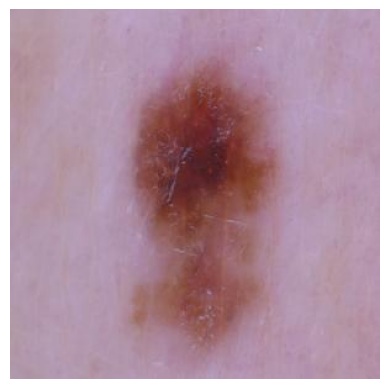

In [10]:

plt.imshow(image)
plt.axis('off') 
plt.show()

In [11]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are an expert radiologist."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Analyze this image."},
            {"type": "image", "image": image},
        ]
    }
]

In [12]:
output = pipe(text=messages, max_new_tokens=256)

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


In [13]:
display(Markdown(output[0]["generated_text"][-1]["content"]))

Based on the image provided, here's an analysis:

**Observations:**

*   **Dark, Oval-Shaped Lesion:** There's a distinct, dark, oval-shaped lesion present on the skin. The lesion appears relatively well-defined with clear borders, though the edges are somewhat irregular.
*   **Color:** The lesion's hue is predominantly dark, possibly indicating hyperpigmentation or increased melanin production.

**Differential Diagnosis (Possible Considerations):**

Given the appearance, several possibilities could be considered, though none are definitive without further information (clinical history, prior imaging, and/or biopsy). Here are some possibilities:

1.  **Melanoma:** Although the shape and coloration are not *typical*, melanoma must always be considered. It can present with atypical features.
2.  **Dysplastic Nevus (Atypical Mole):** These moles can have irregular borders and color variation.
3.  **Pigmented Skin Lesion:** Common skin conditions like lentigines (age spots) or seborrheic keratoses could present with similar appearance.
4.  **Other Benign Lesions:** Some other benign skin growths could mimic the appearance of a dark, oval lesion.

**Recommendations:**

# COVID induced pneumonia

Let's also analyse some COVID induced pneumonia images. We will use images from the dataset: [COVID-19 Xray Dataset (Train & Test Sets)](https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets)

In [14]:
image_path = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png"
image = Image.open(image_path)

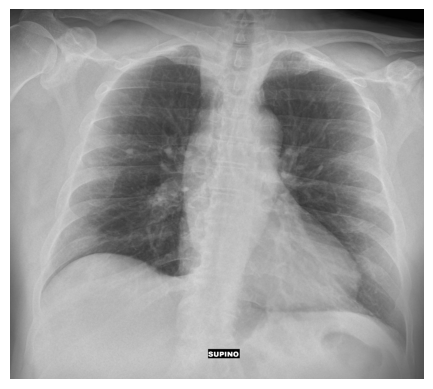

In [15]:
plt.imshow(image)
plt.axis('off') 
plt.show()

In [16]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are an expert radiologist."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Analyze this X-Ray image to identify signs of pneumonia."},
            {"type": "image", "image": image},
        ]
    }
]

In [17]:
output = pipe(text=messages, max_new_tokens=256)

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


In [18]:
display(Markdown(output[0]["generated_text"][-1]["content"]))

As an AI, I am unable to provide medical diagnoses. However, I can provide you with information about the findings that could suggest pneumonia.

The X-ray shows the chest in a supine position.

Based on the X-ray, there is no obvious consolidation (dense opacification) in the lungs, which is a hallmark sign of pneumonia. The lung fields appear relatively clear, with no distinct areas of increased density. The costophrenic angles are sharp. The heart size appears within normal limits.

However, I am unable to give you an accurate diagnosis.

If you are concerned about a possible pneumonia, it is essential to seek the advice of a qualified healthcare professional.


# Brain MRI scans

We are looking next to selections from a [Brain Tumor MRI dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset).

In [19]:
image_path = "/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0012.jpg"
image = Image.open(image_path)

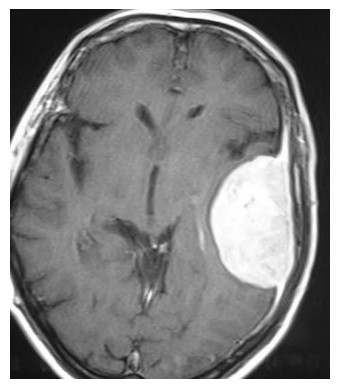

In [20]:
plt.imshow(image)
plt.axis('off') 
plt.show()

In [21]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are an expert radiologist."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Analyze this image, identify the modality and suggest diagnosis."},
            {"type": "image", "image": image},
        ]
    }
]

In [22]:
output = pipe(text=messages, max_new_tokens=300)

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


In [23]:
display(Markdown(output[0]["generated_text"][-1]["content"]))

Based on the image, the modality is **Magnetic Resonance Imaging (MRI)**.

The image shows a large, fluid-filled lesion in the left cerebral hemisphere, appearing hyperintense on T2-weighted imaging (which is typical for fluid). The surrounding brain tissue is compressed.

**Diagnosis:**

The most likely diagnosis is a **large, cystic brain lesion**, likely a **brain tumor**. Given the location, size, and characteristics on MRI, possibilities include:

*   **Cerebrospinal Fluid (CSF) Leak/Rupture:** This is a strong consideration, particularly if there is no obvious mass or focal neurological deficits.  It could be a benign leak or a malignant one.
*   **Cerebral Cyst:** Less likely, as a cyst in this location would usually be a benign, congenital lesion.
*   **Brain Tumor (e.g., Glioblastoma Multiforme, Meningioma, Metastasis):** This is a possibility, and further imaging and clinical correlation would be needed to differentiate.
*   **Abscess:** An abscess is less likely, unless there are signs of infection (fever, elevated inflammatory markers).

To narrow down the diagnosis and rule out other possibilities, additional imaging such as:

*   **Contrast-enhanced MRI:** To assess for vascularity and enhancement of the lesion.
*   **CT Scan:** May be helpful to evaluate for bone erosion or calcifications.
*   **Bi

# Histopathology images

We will inspect as well breast histopathology images from the dataset [BreaKHis 400X](https://www.kaggle.com/datasets/forderation/breakhis-400x).

In [24]:
image_path = "/kaggle/input/breakhis-400x/BreaKHis 400X/train/malignant/SOB_M_DC-14-11031-400-009.png"
image = Image.open(image_path)

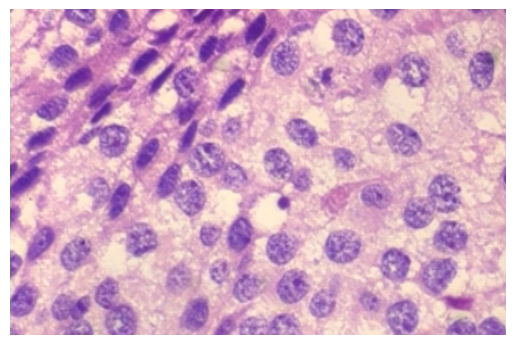

In [25]:
plt.imshow(image)
plt.axis('off') 
plt.show()

In [26]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are an expert radiologist."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Analyze this image, identify the modality and suggest diagnosis."},
            {"type": "image", "image": image},
        ]
    }
]

In [27]:
output = pipe(text=messages, max_new_tokens=300)

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


In [28]:
display(Markdown(output[0]["generated_text"][-1]["content"]))

Based on the image provided, the modality is **histopathology**.

The image shows a microscopic view of tissue. The cells are relatively small and round, with a vesicular nucleus and prominent nucleoli. This morphology is highly suggestive of **malignant small cell carcinoma**. The cells are arranged in sheets with minimal cytoplasm and a high nuclear-to-cytoplasmic ratio, further supporting this diagnosis.

A definitive diagnosis requires correlation with the patient's clinical history and further pathological studies (immunohistochemistry, etc.) but the image provides strong initial evidence for the presence of small cell carcinoma.


# Conclusions


This specialized model from Google DeepMind allows interpretation of a variety of medical images.   
We looked to X-Ray images for chest, MRI scan slices for brain, skin melanoma images, and breast cancer hystopathology images.

While the amount of details and specificity of medical comments is impressive, the model is also providing clear information that its output it is not to be used as a definitive medical diagnosys.


These are possible medical applications for MedGemma:

* Diagnostic Assistance:
    * Radiology (X-rays, MRI): Differential diagnosis from images + clinical notes.
    * Dermatology: Skin lesion classification and triage support.
    * Ophthalmology: Retinal image analysis (e.g., diabetic retinopathy).* 
    * Histopathology: Interpretation of digitized tissue slides.
  

* Clinical Decision Support:
    * Symptom analysis and diagnostic suggestions.
    * Triage support in emergency or outpatient settings.


* Medical Research:
    * Literature summarization, question answering from research papers.
    * Hypothesis generation from clinical data or case reports.

